In [452]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import plotly.graph_objects as go
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [453]:
!pip install plotly==5.7.0
import plotly
from plotly.offline import init_notebook_mode, iplot

In [454]:
df=pd.read_csv("C:/Users/faiza/anaconda3/Jupyter Scripts/immo_data.csv")
df

,regio1,serviceCharge,heatingType,telekomTvOffer,telekomHybridUploadSpeed,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,...,regio2,regio3,description,facilities,heatingCosts,energyEfficiencyClass,lastRefurbish,electricityBasePrice,electricityKwhPrice,date
0,Nordrhein_Westfalen,245.00,central_heating,ONE_YEAR_FREE,NaN,False,False,6,4.62,10.0,...,Dortmund,Schüren,Die ebenerdig zu erreichende Erdgeschosswohnun...,Die Wohnung ist mit Laminat ausgelegt. Das Bad...,NaN,NaN,NaN,NaN,NaN,May19
1,Rheinland_Pfalz,134.00,self_contained_central_heating,ONE_YEAR_FREE,NaN,False,True,8,3.47,10.0,...,Rhein_Pfalz_Kreis,Böhl_Iggelheim,Alles neu macht der Mai – so kann es auch für ...,NaN,NaN,NaN,2019.0,NaN,NaN,May19
2,Sachsen,255.00,floor_heating,ONE_YEAR_FREE,10.0,True,True,8,2.72,2.4,...,Dresden,Äußere_Neustadt_Antonstadt,Der Neubau entsteht im Herzen der Dresdner Neu...,"* 9 m² Balkon\n* Bad mit bodengleicher Dusche,...",NaN,NaN,NaN,NaN,NaN,Oct19
3,Sachsen,58.15,district_heating,ONE_YEAR_FREE,NaN,False,True,9,1.53,40.0,...,Mittelsachsen_Kreis,Freiberg,Abseits von Lärm und Abgasen in Ihre neue Wohn...,NaN,87.23,NaN,NaN,NaN,NaN,May19
4,Bremen,138.00,self_contained_central_heating,NaN,NaN,False,True,19,2.46,NaN,...,Bremen,Neu_Schwachhausen,Es handelt sich hier um ein saniertes Mehrfami...,Diese Wohnung wurde neu saniert und ist wie fo...,NaN,NaN,NaN,NaN,NaN,Feb20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268845,Bayern,90.00,heat_pump,ONE_YEAR_FREE,NaN,False,True,0,2.74,10.0,...,Weilheim_Schongau_Kreis,Eberfing,"Diese schöne, neuwertige Wohnung im Dachgescho...",Fliesen und Parkett. Sichtbarer Dachstuhl.,NaN,NaN,NaN,NaN,NaN,Feb20
268846,Hessen,220.00,gas_heating,NaN,NaN,False,True,12,6.49,NaN,...,Bergstraße_Kreis,Viernheim,Hier wird eine Wohnung im 2 Familienhaus angeb...,"Parkett, Kamin, Badewanne&Dusche\nGroßer Balko...",NaN,NaN,2015.0,NaN,NaN,May19
268847,Hessen,220.00,central_heating,ONE_YEAR_FREE,NaN,False,True,21,2.90,40.0,...,Limburg_Weilburg_Kreis,Limburg_an_der_Lahn,gemütliche 4-Zimmer-Wohnung im Obergeschoss ei...,"Böden: Wohn-/Schlafbereich = Laminat, Küche + ...",NaN,NaN,2019.0,NaN,NaN,Feb20
268848,Nordrhein_Westfalen,175.00,heat_pump,NaN,NaN,True,True,16,4.39,NaN,...,Köln,Dellbrück,"Neubau Erstbezug, gehobener Standard, alle Ein...","Wände:\nMaler­vlies, weiß gestrichen alter­nat...",40.00,NO_INFORMATION,2019.0,NaN,NaN,May19


In [455]:
#filter out only NRW rows
nrwdata=df[df['regio1']=='Nordrhein_Westfalen']
nrwdata.shape

#62863 rows of NRW data

(62863, 49)

In [456]:
nrwdata.head()

,regio1,serviceCharge,heatingType,telekomTvOffer,telekomHybridUploadSpeed,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,...,regio2,regio3,description,facilities,heatingCosts,energyEfficiencyClass,lastRefurbish,electricityBasePrice,electricityKwhPrice,date
0,Nordrhein_Westfalen,245.0,central_heating,ONE_YEAR_FREE,NaN,False,False,6,4.62,10.0,...,Dortmund,Schüren,Die ebenerdig zu erreichende Erdgeschosswohnun...,Die Wohnung ist mit Laminat ausgelegt. Das Bad...,NaN,NaN,NaN,NaN,NaN,May19
9,Nordrhein_Westfalen,95.0,self_contained_central_heating,ONE_YEAR_FREE,NaN,False,False,7,1.92,40.0,...,Gelsenkirchen,Bulmke_Hüllen,Sie sind auf der Suche nach einer gepflegten u...,In Ihrem neuen Zuhause können Sie nach wenigen...,NaN,NaN,NaN,NaN,NaN,Oct19
13,Nordrhein_Westfalen,200.0,central_heating,ONE_YEAR_FREE,NaN,False,False,3,3.45,40.0,...,Hamm,Mitte,Die angebotene Wohnfläche befindet sich im dri...,Die Wohnung wird vor der Neuvermietung hochwer...,100.00,NaN,2019.0,NaN,NaN,Oct19
14,Nordrhein_Westfalen,215.0,gas_heating,ONE_YEAR_FREE,10.0,True,True,12,3.76,2.4,...,Dortmund,Kirchhörde,Der attraktive Neubau mit 10 Wohnungen liegt i...,"Fußbodenheizung, hochwertiger Bodenbelag Parke...",43.05,NaN,2018.0,NaN,NaN,May19
18,Nordrhein_Westfalen,121.0,central_heating,ONE_YEAR_FREE,NaN,False,True,5,3.12,40.0,...,Duisburg,Obermarxloh,Gepflegtes Mehrfamilienhaus in Duisburg-Oberm...,• Balkon\n • Wanne\n • Isolierverglasung\n • g...,77.00,NaN,NaN,NaN,NaN,May19


# Select rows pertaining to Cologne

In [457]:
cgndata=nrwdata[nrwdata['regio2']=='Köln']
cgndata.head()

,regio1,serviceCharge,heatingType,telekomTvOffer,telekomHybridUploadSpeed,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,...,regio2,regio3,description,facilities,heatingCosts,energyEfficiencyClass,lastRefurbish,electricityBasePrice,electricityKwhPrice,date
253,Nordrhein_Westfalen,NaN,NaN,ONE_YEAR_FREE,NaN,False,False,10,4.91,40.0,...,Köln,Altstadt_&_Neustadt_Nord,gepflegtes Mehrfamilienhaus,"zeitlose Möblierung, Laminatboden, separate Ei...",NaN,NaN,NaN,NaN,NaN,Feb20
336,Nordrhein_Westfalen,200.0,floor_heating,NaN,NaN,True,True,11,4.42,NaN,...,Köln,Dellbrück,Zum 01.11.2019 können Sie diese Maisonette-Woh...,"Bodentiefe Fenster, Fussbodenheizung, Fensterb...",NaN,NaN,NaN,NaN,NaN,Oct19
352,Nordrhein_Westfalen,110.0,central_heating,ONE_YEAR_FREE,NaN,False,False,4,4.55,10.0,...,Köln,Sülz,Herzlich Willkommen in Ihrem neuen Zuhause.\n\...,NaN,NaN,NaN,NaN,NaN,NaN,Oct19
524,Nordrhein_Westfalen,274.8,central_heating,ONE_YEAR_FREE,10.0,False,True,16,5.08,10.0,...,Köln,Altstadt_&_Neustadt_Nord,Diese schöne Wohnung befindet sich in bester I...,Die Wohnung ist modern ausgestattet. \n\nDas W...,NaN,NaN,NaN,90.76,0.1985,Sep18
590,Nordrhein_Westfalen,135.0,central_heating,NONE,NaN,False,True,10,4.37,2.4,...,Köln,Lövenich,ANMELDUNG FÜR BESICHTIGUNGSTERMIN\nMit dem unt...,NaN,85.0,NaN,NaN,NaN,NaN,Oct19


In [458]:
cgndata.shape

(2709, 49)

In [459]:
cgndata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2709 entries, 253 to 268848
Data columns (total 49 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   regio1                    2709 non-null   object 
 1   serviceCharge             2579 non-null   float64
 2   heatingType               2314 non-null   object 
 3   telekomTvOffer            2241 non-null   object 
 4   telekomHybridUploadSpeed  429 non-null    float64
 5   newlyConst                2709 non-null   bool   
 6   balcony                   2709 non-null   bool   
 7   picturecount              2709 non-null   int64  
 8   pricetrend                2698 non-null   float64
 9   telekomUploadSpeed        2241 non-null   float64
 10  totalRent                 2277 non-null   float64
 11  yearConstructed           1972 non-null   float64
 12  scoutId                   2709 non-null   int64  
 13  noParkSpaces              935 non-null    float64
 14  firi

# Drop unnecessary columns 

In [460]:
cgndata.drop(['livingSpaceRange','street','description','facilities','geo_krs','geo_plz','scoutId','regio1','telekomHybridUploadSpeed','telekomUploadSpeed','telekomTvOffer','pricetrend','regio3','noRoomsRange','picturecount','geo_bln','date',\
    'houseNumber','streetPlain','firingTypes','yearConstructedRange'],axis=1,inplace=True)

C:\Users\faiza\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [461]:
cgndata.columns[cgndata.isnull().any()]

Index(['serviceCharge', 'heatingType', 'totalRent', 'yearConstructed',
       'noParkSpaces', 'condition', 'interiorQual', 'petsAllowed',
       'typeOfFlat', 'thermalChar', 'floor', 'numberOfFloors', 'heatingCosts',
       'energyEfficiencyClass', 'lastRefurbish', 'electricityBasePrice',
       'electricityKwhPrice'],
      dtype='object')

In [462]:
def missing_zero_values_table(df):
        zero_val = (df == 0.00).astype(int).sum(axis=0)
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(
        columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})
        mz_table['Total Zero Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']
        mz_table['% Total Zero Missing Values'] = 100 * mz_table['Total Zero Missing Values'] / len(df)
        mz_table['Data Type'] = df.dtypes
        mz_table = mz_table[
            mz_table.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"      
            "There are " + str(mz_table.shape[0]) +
              " columns that have missing values.")
#         mz_table.to_excel('D:/sampledata/missing_and_zero_values.xlsx', freeze_panes=(1,0), index = False)
        return mz_table

df = missing_zero_values_table(cgndata)
df

Your selected dataframe has 28 columns and 2709 Rows.
There are 17 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type
electricityKwhPrice,0,2236,82.5,2236,82.5,float64
electricityBasePrice,0,2236,82.5,2236,82.5,float64
heatingCosts,25,2206,81.4,2231,82.4,float64
energyEfficiencyClass,0,2064,76.2,2064,76.2,object
noParkSpaces,44,1774,65.5,1818,67.1,float64
lastRefurbish,0,1710,63.1,1710,63.1,float64
thermalChar,0,1366,50.4,1366,50.4,float64
petsAllowed,0,1073,39.6,1073,39.6,object
interiorQual,0,955,35.3,955,35.3,object
yearConstructed,0,737,27.2,737,27.2,float64


In [463]:
cgndata.drop(['electricityKwhPrice','electricityBasePrice','heatingCosts','energyEfficiencyClass','noParkSpaces','lastRefurbish','thermalChar','petsAllowed','interiorQual','numberOfFloors','yearConstructed'],axis=1,inplace=True)
cgndata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2709 entries, 253 to 268848
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   serviceCharge  2579 non-null   float64
 1   heatingType    2314 non-null   object 
 2   newlyConst     2709 non-null   bool   
 3   balcony        2709 non-null   bool   
 4   totalRent      2277 non-null   float64
 5   hasKitchen     2709 non-null   bool   
 6   cellar         2709 non-null   bool   
 7   baseRent       2709 non-null   float64
 8   livingSpace    2709 non-null   float64
 9   condition      2147 non-null   object 
 10  lift           2709 non-null   bool   
 11  baseRentRange  2709 non-null   int64  
 12  typeOfFlat     2470 non-null   object 
 13  noRooms        2709 non-null   float64
 14  floor          2292 non-null   float64
 15  garden         2709 non-null   bool   
 16  regio2         2709 non-null   object 
dtypes: bool(6), float64(6), int64(1), object(4)
memo

C:\Users\faiza\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [464]:
cgndata.columns[cgndata.isnull().any()]

Index(['serviceCharge', 'heatingType', 'totalRent', 'condition', 'typeOfFlat',
       'floor'],
      dtype='object')

In [465]:
cgndata.dropna(subset=['totalRent'],inplace=True)

C:\Users\faiza\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [466]:
cgndata['condition'].fillna("Other", inplace=True) # fill the NA by Other
cgndata['condition'].value_counts()

C:\Users\faiza\anaconda3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



well_kept                             540
Other                                 470
mint_condition                        301
fully_renovated                       263
first_time_use_after_refurbishment    186
modernized                            173
refurbished                           163
first_time_use                        153
negotiable                             16
need_of_renovation                     12
Name: condition, dtype: int64

In [467]:
otherscondition = cgndata['condition'].value_counts().tail(2).index

othersregion = list(cgndata['condition'].value_counts().tail(2).index)
def editcondition(dflist):
    if dflist in otherscondition:
        return 'Other'
    else:
        return dflist

cgndata['condition'] =cgndata['condition'].apply(editcondition)
cgndata['condition'].value_counts()

C:\Users\faiza\AppData\Local\Temp/ipykernel_35920/689387860.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



well_kept                             540
Other                                 498
mint_condition                        301
fully_renovated                       263
first_time_use_after_refurbishment    186
modernized                            173
refurbished                           163
first_time_use                        153
Name: condition, dtype: int64

In [468]:
plotter = cgndata.groupby('condition')['totalRent'].agg(['mean'])
plotter.columns = ["mean"]
plotter['condition'] = plotter.index

data = [
    {
        'x': plotter['condition'],
        'y': plotter['mean'],
        'mode': 'markers+text',
        'text' : plotter['condition'],
        'textposition' : 'bottom center',
        'marker': {  
            'size': 20,
        }
    }
]

layout = go.Layout(title="Average rental per month group by apartment condition", 
                   xaxis=dict(title='Apartment Condition'),
                   yaxis=dict(title='Cost of rental')
                  )
fig = go.Figure(data = data, layout = layout)
iplot(fig, filename='scatter0')

In [469]:
cgndata.columns[cgndata.isnull().any()]

Index(['serviceCharge', 'heatingType', 'typeOfFlat', 'floor'], dtype='object')

In [470]:
cgndata['baseRent'].describe().round(2)

count    2277.00
mean      982.14
std       541.03
min       220.00
25%       634.50
50%       830.00
75%      1200.00
max      5000.00
Name: baseRent, dtype: float64

In [471]:
cgndata['totalRent'].describe().round(2)

count    2277.00
mean     1188.51
std       625.64
min       280.00
25%       780.73
50%      1000.00
75%      1440.00
max      5629.10
Name: totalRent, dtype: float64

In [472]:
fig = px.scatter(cgndata, x='totalRent', y='baseRent')
fig.show()

In [473]:
cgndata['Pricepm2'] = cgndata['baseRent'] / cgndata['livingSpace']


C:\Users\faiza\AppData\Local\Temp/ipykernel_35920/3131349428.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [474]:
cgndata['Pricepm2'].value_counts()

10.000000    64
15.000000    39
12.000000    36
12.500000    34
11.000000    31
             ..
17.650022     1
16.951220     1
15.952381     1
12.370690     1
9.719946      1
Name: Pricepm2, Length: 1536, dtype: int64

In [475]:
cgndata['Pricepm2'].describe()

count    2277.000000
mean             inf
std              NaN
min         2.345372
25%        10.731707
50%        12.500000
75%        15.188787
max              inf
Name: Pricepm2, dtype: float64

In [476]:
cgndata['Pricepm2'].isnull()

336       False
352       False
524       False
590       False
703       False
          ...  
268381    False
268523    False
268637    False
268772    False
268848    False
Name: Pricepm2, Length: 2277, dtype: bool

In [477]:

# Replacing infinite with nan
cgndata.replace([np.inf, -np.inf], np.nan, inplace=True)
  
# Dropping all the rows with nan values
cgndata.dropna(inplace=True)

C:\Users\faiza\anaconda3\lib\site-packages\pandas\core\frame.py:5238: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [478]:
cgndata['additioncost'] = cgndata['totalRent'] - cgndata['baseRent']

C:\Users\faiza\AppData\Local\Temp/ipykernel_35920/1007873579.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [479]:
fig = px.scatter(cgndata, x='totalRent', y='Pricepm2')
fig.show()

In [480]:
cgndata['heatingType'].fillna(cgndata['heatingType'].mode()[0], inplace=True)
cgndata['serviceCharge'].fillna(cgndata['serviceCharge'].mode()[0], inplace=True)
cgndata['typeOfFlat'].fillna(cgndata['typeOfFlat'].mode()[0], inplace=True)

In [481]:
cgndata.drop(['baseRent'],axis=1,inplace=True)

In [482]:
cgndata['floor'].value_counts()

 1.0     454
 2.0     412
 3.0     258
 0.0     204
 4.0     180
 5.0      68
 6.0      20
 7.0      16
 8.0       7
 13.0      5
 9.0       5
 12.0      4
 11.0      3
 10.0      3
-1.0       2
 14.0      2
 25.0      1
 41.0      1
 29.0      1
 16.0      1
Name: floor, dtype: int64

In [483]:
cgndata = cgndata[(cgndata['floor'] >= -1) & (cgndata['floor'] <= 20)] # Floor should contain only basement - 20th floor

In [484]:
cgndata.head()

,serviceCharge,heatingType,newlyConst,balcony,totalRent,hasKitchen,cellar,livingSpace,condition,lift,baseRentRange,typeOfFlat,noRooms,floor,garden,regio2,Pricepm2,additioncost
336,200.0,floor_heating,True,True,1500.0,False,True,120.00,first_time_use,False,7,maisonette,3.0,1.0,False,Köln,10.833333,200.0
352,110.0,central_heating,False,False,608.0,True,True,29.00,well_kept,True,3,apartment,1.0,2.0,False,Köln,15.275862,165.0
524,274.8,central_heating,False,True,1470.8,False,False,92.00,well_kept,True,7,ground_floor,2.0,1.0,False,Köln,13.000000,274.8
590,135.0,central_heating,False,True,950.0,False,False,75.01,well_kept,False,5,apartment,2.0,1.0,False,Köln,9.732036,220.0
828,170.0,central_heating,False,True,1770.0,False,True,100.35,modernized,False,7,apartment,4.0,1.0,False,Köln,14.947683,270.0


<AxesSubplot:>

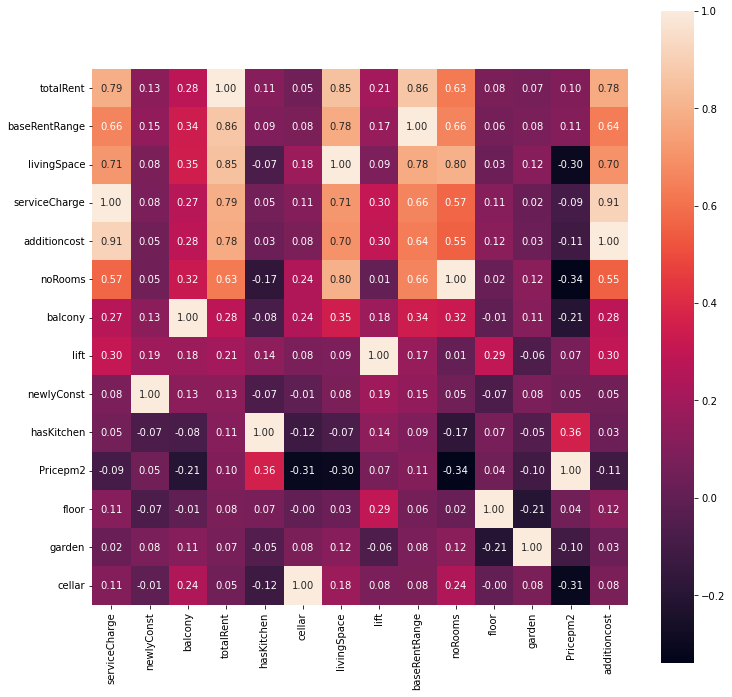

In [485]:
f, ax = plt.subplots(figsize=(12, 12))

sns.heatmap(cgndata.corr().sort_values(by='totalRent',ascending=False), square = True,fmt='.2f' ,annot = True)

In [486]:
#least correlation to total rent
cgndata.drop(['cellar','floor','garden'],axis=1,inplace=True)

C:\Users\faiza\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='totalRent', ylabel='Density'>

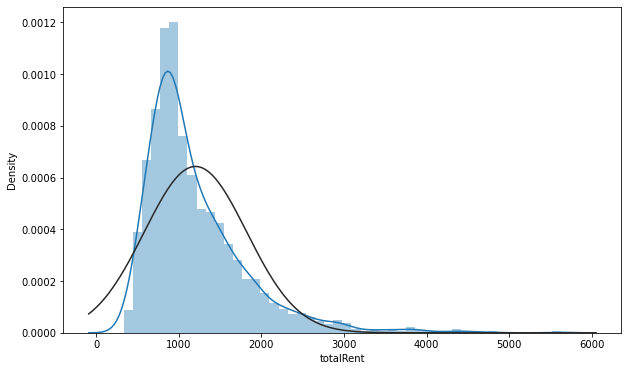

In [487]:
fig,ax = plt.subplots(figsize=(10,6))
sns.distplot(cgndata['totalRent'],fit=norm)

# Feeding the data to a ML algorithm

In [488]:
final = cgndata.copy()
final.drop(['regio2'],axis=1,inplace=True)
final.head()

,serviceCharge,heatingType,newlyConst,balcony,totalRent,hasKitchen,livingSpace,condition,lift,baseRentRange,typeOfFlat,noRooms,Pricepm2,additioncost
336,200.0,floor_heating,True,True,1500.0,False,120.00,first_time_use,False,7,maisonette,3.0,10.833333,200.0
352,110.0,central_heating,False,False,608.0,True,29.00,well_kept,True,3,apartment,1.0,15.275862,165.0
524,274.8,central_heating,False,True,1470.8,False,92.00,well_kept,True,7,ground_floor,2.0,13.000000,274.8
590,135.0,central_heating,False,True,950.0,False,75.01,well_kept,False,5,apartment,2.0,9.732036,220.0
828,170.0,central_heating,False,True,1770.0,False,100.35,modernized,False,7,apartment,4.0,14.947683,270.0


In [489]:
#normalization

for cols in final.columns:
    if final[cols].dtype == 'int64' or final[cols].dtype == 'float64':
        if cols != 'totalRent':
            final[cols] = ((final[cols] - final[cols].mean())/(final[cols].std()))

final           

,serviceCharge,heatingType,newlyConst,balcony,totalRent,hasKitchen,livingSpace,condition,lift,baseRentRange,typeOfFlat,noRooms,Pricepm2,additioncost
336,0.099293,floor_heating,True,True,1500.00,False,1.191416,first_time_use,False,0.785359,maisonette,0.519960,-0.517815,-0.090315
352,-0.765698,central_heating,False,False,608.00,True,-1.283053,well_kept,True,-1.632488,apartment,-1.464519,0.248070,-0.396299
524,0.818197,central_heating,False,True,1470.80,False,0.430041,well_kept,True,0.785359,ground_floor,-0.472279,-0.144285,0.563618
590,-0.525422,central_heating,False,True,950.00,False,-0.031951,well_kept,False,-0.423565,apartment,-0.472279,-0.707677,0.084534
828,-0.189037,central_heating,False,True,1770.00,False,0.657093,modernized,False,0.785359,apartment,1.512200,0.191492,0.521655
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268145,-0.765698,central_heating,False,False,835.00,False,-0.032223,Other,False,-0.423565,roof_storey,1.512200,-0.891344,-0.221451
268337,-0.438923,central_heating,False,True,525.90,False,-0.262539,Other,False,-2.236950,apartment,-0.472279,-1.577241,0.032079
268523,-0.285147,self_contained_central_heating,False,True,873.93,False,-0.074370,Other,False,-0.423565,apartment,1.512200,-0.709761,-0.440012
268637,-0.573478,central_heating,False,False,970.00,False,-0.440102,refurbished,False,0.180897,apartment,-0.472279,0.028113,-0.702284


In [490]:
columns = []
for cols in final.columns:
    if final[cols].dtype == 'object' or final[cols].dtype == 'bool':
        columns.append(cols)
        
dummies_feature = pd.get_dummies(final[columns])
dummies_feature.head()

,newlyConst,balcony,hasKitchen,lift,heatingType_central_heating,heatingType_combined_heat_and_power_plant,heatingType_district_heating,heatingType_electric_heating,heatingType_floor_heating,heatingType_gas_heating,...,typeOfFlat_apartment,typeOfFlat_ground_floor,typeOfFlat_half_basement,typeOfFlat_loft,typeOfFlat_maisonette,typeOfFlat_other,typeOfFlat_penthouse,typeOfFlat_raised_ground_floor,typeOfFlat_roof_storey,typeOfFlat_terraced_flat
336,True,True,False,False,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
352,False,False,True,True,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
524,False,True,False,True,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
590,False,True,False,False,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
828,False,True,False,False,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [491]:
final = pd.concat([final, dummies_feature], axis=1)
final = final.drop(columns=columns)
final.head()

,serviceCharge,totalRent,livingSpace,baseRentRange,noRooms,Pricepm2,additioncost,heatingType_central_heating,heatingType_combined_heat_and_power_plant,heatingType_district_heating,...,typeOfFlat_apartment,typeOfFlat_ground_floor,typeOfFlat_half_basement,typeOfFlat_loft,typeOfFlat_maisonette,typeOfFlat_other,typeOfFlat_penthouse,typeOfFlat_raised_ground_floor,typeOfFlat_roof_storey,typeOfFlat_terraced_flat
336,0.099293,1500.0,1.191416,0.785359,0.519960,-0.517815,-0.090315,0,0,0,...,0,0,0,0,1,0,0,0,0,0
352,-0.765698,608.0,-1.283053,-1.632488,-1.464519,0.248070,-0.396299,1,0,0,...,1,0,0,0,0,0,0,0,0,0
524,0.818197,1470.8,0.430041,0.785359,-0.472279,-0.144285,0.563618,1,0,0,...,0,1,0,0,0,0,0,0,0,0
590,-0.525422,950.0,-0.031951,-0.423565,-0.472279,-0.707677,0.084534,1,0,0,...,1,0,0,0,0,0,0,0,0,0
828,-0.189037,1770.0,0.657093,0.785359,1.512200,0.191492,0.521655,1,0,0,...,1,0,0,0,0,0,0,0,0,0


In [492]:
#train test split

X = final.drop(['totalRent'],axis=1)
y = final['totalRent']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 29)

In [493]:
x_train.shape, y_test.shape

((1233, 37), (411,))

In [494]:
x_train.head()

,serviceCharge,livingSpace,baseRentRange,noRooms,Pricepm2,additioncost,heatingType_central_heating,heatingType_combined_heat_and_power_plant,heatingType_district_heating,heatingType_electric_heating,...,typeOfFlat_apartment,typeOfFlat_ground_floor,typeOfFlat_half_basement,typeOfFlat_loft,typeOfFlat_maisonette,typeOfFlat_other,typeOfFlat_penthouse,typeOfFlat_raised_ground_floor,typeOfFlat_roof_storey,typeOfFlat_terraced_flat
238321,-1.822909,-1.364629,-0.423565,-1.464519,1.924495,-1.926223,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
138883,-0.525422,-0.630446,-1.632488,0.519960,-0.954232,-0.658572,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
180969,-1.342358,-1.745317,-0.423565,-1.464519,7.814771,-1.401678,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
161480,-0.381257,-0.604614,0.180897,-1.464519,0.803666,-0.527436,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
215893,-0.092927,-0.603254,-1.028027,-0.968399,-0.533777,-0.265163,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


Linear Regression

In [495]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
regr.fit(x_train, y_train)


LinearRegression()

In [496]:
pd.DataFrame(regr.coef_, x_train.columns, columns = ['Coeff'])

,Coeff
serviceCharge,42.082397
livingSpace,377.689585
baseRentRange,131.713385
noRooms,-40.253052
Pricepm2,174.590461
additioncost,131.310539
heatingType_central_heating,-24.547859
heatingType_combined_heat_and_power_plant,-49.180459
heatingType_district_heating,12.776802
heatingType_electric_heating,27.376646


In [497]:
print(regr.intercept_)

1215.1813900060463


In [498]:
predictions_lr =regr.predict(x_test)

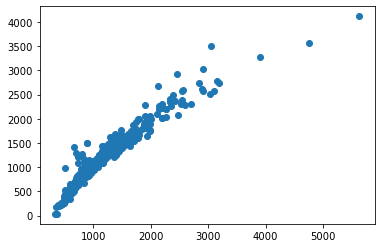

In [499]:
plt.scatter(y_test, predictions_lr)

(array([  5.,   9.,  83., 258.,  48.,   5.,   1.,   0.,   1.,   1.]),
 array([-752.44167698, -526.36554769, -300.2894184 ,  -74.21328911,
         151.86284018,  377.93896947,  604.01509876,  830.09122805,
        1056.16735734, 1282.24348663, 1508.31961592]),
 <BarContainer object of 10 artists>)

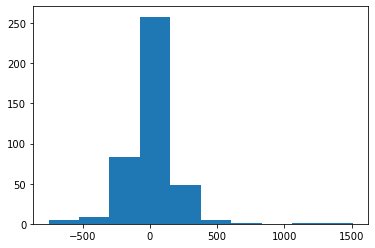

In [500]:
plt.hist(y_test - predictions_lr)

In [501]:
from sklearn import metrics
print('MAE : ', metrics.mean_absolute_error(y_test, predictions_lr))
print('MSE : ', metrics.mean_squared_error(y_test, predictions_lr))
print('RMSE : ', np.sqrt(metrics.mean_squared_error(y_test, predictions_lr)))

MAE :  113.71369606616005
MSE :  33410.97860761994
RMSE :  182.78670249123687


Decision Tree Regressor

In [502]:
from sklearn.tree import DecisionTreeRegressor 
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(x_train, y_train)
predictions_dt =regressor.predict(x_test)

from sklearn import metrics
print('MAE : ', metrics.mean_absolute_error(y_test, predictions_dt))
print('MSE : ', metrics.mean_squared_error(y_test, predictions_dt))
print('RMSE : ', np.sqrt(metrics.mean_squared_error(y_test, predictions_dt)))

MAE :  73.47856447688565
MSE :  17603.358765693432
RMSE :  132.67764983482874


Random Forest Regressor

In [503]:
from sklearn.ensemble import RandomForestRegressor 
reg = RandomForestRegressor(random_state = 0)
reg.fit(x_train, y_train)
predictions_rf =reg.predict(x_test)

from sklearn import metrics
print('MAE : ', metrics.mean_absolute_error(y_test, predictions_rf))
print('MSE : ', metrics.mean_squared_error(y_test, predictions_rf))
print('RMSE : ', np.sqrt(metrics.mean_squared_error(y_test, predictions_rf)))

MAE :  63.161620194647206
MSE :  14810.825832429757
RMSE :  121.69973636959843
